In [1]:
import json
import pandas as pd
from pandas.io.json import json_normalize
import seaborn as sns

#Validating the data by checking sample
data_json=json.load((open('world_bank_projects.json')))
#print(data_json)
data_json[0]


{'sector': [{'Name': 'Primary education'},
  {'Name': 'Secondary education'},
  {'Name': 'Public administration- Other social services'},
  {'Name': 'Tertiary education'}],
 'supplementprojectflg': 'N',
 'projectfinancialtype': 'IDA',
 'prodline': 'PE',
 'mjtheme': ['Human development'],
 'idacommamt': 130000000,
 'impagency': 'MINISTRY OF EDUCATION',
 'project_name': 'Ethiopia General Education Quality Improvement Project II',
 'mjthemecode': '8,11',
 'closingdate': '2018-07-07T00:00:00Z',
 'totalcommamt': 130000000,
 'id': 'P129828',
 'mjsector_namecode': [{'code': 'EX', 'name': 'Education'},
  {'code': 'EX', 'name': 'Education'},
  {'code': 'BX', 'name': 'Public Administration, Law, and Justice'},
  {'code': 'EX', 'name': 'Education'}],
 'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
 'sector1': {'Percent': 46, 'Name': 'Primary education'},
 'lendinginstr': 'Investment Project Financing',
 'countrycode': 'ET',
 'sector2': {'Percent': 26

In [2]:
df = pd.read_json("world_bank_projects.json")
# Inspect the first 5 rows of the DataFrame to get and idea of the row and column information and formats
df.head()


,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,majorsector_percent,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id
0,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11",2018-07-07T00:00:00Z,...,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...",November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'}
1,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6",NaN,...,"[{'Percent': 70, 'Name': 'Public Administratio...",November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'}
2,[{'Name': 'Rural and Inter-Urban Roads and Hig...,Y,IDA,PE,"[Trade and integration, Public sector governan...",6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Tuvalu Aviation Investment Project - Additiona...,"5,2,11,6",NaN,...,"[{'Percent': 100, 'Name': 'Transportation'}]",November,"[{'code': '47', 'name': 'Regional integration'...",Tuvalu,http://www.worldbank.org/projects/P145310?lang=en,IBRD,Active,0,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",{'$oid': '52b213b38594d8a2be17c782'}
3,[{'Name': 'Other social services'}],N,OTHER,RE,"[Social dev/gender/inclusion, Social dev/gende...",0,LABOR INTENSIVE PUBLIC WORKS PROJECT PMU,Gov't and Civil Society Organization Partnership,"7,7",NaN,...,"[{'Percent': 100, 'Name': 'Health and other so...",October,"[{'code': '57', 'name': 'Participation and civ...",Republic of Yemen,http://www.worldbank.org/projects/P144665?lang=en,IBRD,Active,0,"[{'code': 'JB', 'name': 'Other social services'}]",{'$oid': '52b213b38594d8a2be17c783'}
4,[{'Name': 'General industry and trade sector'}...,N,IDA,PE,"[Trade and integration, Financial and private ...",13100000,MINISTRY OF TRADE AND INDUSTRY,Second Private Sector Competitiveness and Econ...,"5,4",2019-04-30T00:00:00Z,...,"[{'Percent': 50, 'Name': 'Industry and trade'}...",October,"[{'code': '45', 'name': 'Export development an...",Kingdom of Lesotho,http://www.worldbank.org/projects/P144933/seco...,IBRD,Active,0,"[{'code': 'YZ', 'name': 'General industry and ...",{'$oid': '52b213b38594d8a2be17c784'}


In [3]:
#getting more info on type of data in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   sector                    500 non-null    object
 1   supplementprojectflg      498 non-null    object
 2   projectfinancialtype      500 non-null    object
 3   prodline                  500 non-null    object
 4   mjtheme                   491 non-null    object
 5   idacommamt                500 non-null    int64 
 6   impagency                 472 non-null    object
 7   project_name              500 non-null    object
 8   mjthemecode               500 non-null    object
 9   closingdate               370 non-null    object
 10  totalcommamt              500 non-null    int64 
 11  id                        500 non-null    object
 12  mjsector_namecode         500 non-null    object
 13  docty                     446 non-null    object
 14  sector1                   

In [4]:
df.describe()

,idacommamt,totalcommamt,totalamt,approvalfy,lendprojectcost,grantamt,ibrdcommamt
count,5.000000e+02,5.000000e+02,5.000000e+02,500.000000,5.000000e+02,5.000000e+02,5.000000e+02
mean,3.542136e+07,7.271386e+07,6.828146e+07,2013.108000,1.547241e+08,4.432400e+06,3.286010e+07
std,7.681431e+07,1.234705e+08,1.242662e+08,0.722066,4.764211e+08,2.023307e+07,1.089197e+08
min,0.000000e+00,3.000000e+04,0.000000e+00,1999.000000,3.000000e+04,0.000000e+00,0.000000e+00
25%,0.000000e+00,5.000000e+06,0.000000e+00,2013.000000,6.472500e+06,0.000000e+00,0.000000e+00
50%,0.000000e+00,2.500000e+07,2.000000e+07,2013.000000,3.500000e+07,0.000000e+00,0.000000e+00
75%,3.700000e+07,9.045000e+07,8.625000e+07,2013.000000,1.021250e+08,1.695000e+06,0.000000e+00
max,6.000000e+08,1.307800e+09,1.307800e+09,2015.000000,5.170000e+09,3.650000e+08,1.307800e+09


In [5]:
#1.Find the 10 countries with most projects 
top_10_countries=df[['countryname','countrycode']].groupby(['countryname','countrycode']).size().reset_index(name="count").sort_values("count",ascending=False)
top_10_countries.head(10)

,countryname,countrycode,count
39,People's Republic of China,CN,19
64,Republic of Indonesia,ID,19
107,Socialist Republic of Vietnam,VN,17
63,Republic of India,IN,16
97,Republic of Yemen,RY,13
38,People's Republic of Bangladesh,BD,12
34,Nepal,NP,12
25,Kingdom of Morocco,MA,12
76,Republic of Mozambique,MZ,11
0,Africa,3A,11


In [6]:
#However, Africa is not a country but the continent, hence Africa needs to be removed from the list
top_10_countries=top_10_countries[top_10_countries.countrycode !="3A"].head(10)
top_10_countries

,countryname,countrycode,count
39,People's Republic of China,CN,19
64,Republic of Indonesia,ID,19
107,Socialist Republic of Vietnam,VN,17
63,Republic of India,IN,16
97,Republic of Yemen,RY,13
38,People's Republic of Bangladesh,BD,12
34,Nepal,NP,12
25,Kingdom of Morocco,MA,12
76,Republic of Mozambique,MZ,11
5,Burkina Faso,BF,9


In [7]:
#2.Find the top 10 major project themes (using column 'mjtheme_namecode')
#Inspect the data in the column 'mjtheme_namecode
themes=df['mjtheme_namecode'].values
themes

array([list([{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]),
       list([{'code': '1', 'name': 'Economic management'}, {'code': '6', 'name': 'Social protection and risk management'}]),
       list([{'code': '5', 'name': 'Trade and integration'}, {'code': '2', 'name': 'Public sector governance'}, {'code': '11', 'name': 'Environment and natural resources management'}, {'code': '6', 'name': 'Social protection and risk management'}]),
       list([{'code': '7', 'name': 'Social dev/gender/inclusion'}, {'code': '7', 'name': 'Social dev/gender/inclusion'}]),
       list([{'code': '5', 'name': 'Trade and integration'}, {'code': '4', 'name': 'Financial and private sector development'}]),
       list([{'code': '6', 'name': 'Social protection and risk management'}, {'code': '6', 'name': ''}]),
       list([{'code': '2', 'name': 'Public sector governance'}, {'code': '4', 'name': 'Financial and private sector development'}]),
       list([{'code': '11', 'name': 'Environme

In [8]:
#parsing the nested elements from mjtheme namecode
themes_list=[themes_dict for sublist in themes for themes_dict in sublist]
themes_list

[{'code': '8', 'name': 'Human development'},
 {'code': '11', 'name': ''},
 {'code': '1', 'name': 'Economic management'},
 {'code': '6', 'name': 'Social protection and risk management'},
 {'code': '5', 'name': 'Trade and integration'},
 {'code': '2', 'name': 'Public sector governance'},
 {'code': '11', 'name': 'Environment and natural resources management'},
 {'code': '6', 'name': 'Social protection and risk management'},
 {'code': '7', 'name': 'Social dev/gender/inclusion'},
 {'code': '7', 'name': 'Social dev/gender/inclusion'},
 {'code': '5', 'name': 'Trade and integration'},
 {'code': '4', 'name': 'Financial and private sector development'},
 {'code': '6', 'name': 'Social protection and risk management'},
 {'code': '6', 'name': ''},
 {'code': '2', 'name': 'Public sector governance'},
 {'code': '4', 'name': 'Financial and private sector development'},
 {'code': '11', 'name': 'Environment and natural resources management'},
 {'code': '8', 'name': ''},
 {'code': '10', 'name': 'Rural dev

In [9]:
#converting the column to dataframe
themes_df=pd.DataFrame(themes_list)
themes_df

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
...,...,...
1494,10,Rural development
1495,9,Urban development
1496,8,Human development
1497,5,Trade and integration


In [10]:
#Counting the number of times a theme is used for project
count_by_theme=themes_df.groupby(["code","name"]).size() \
                    .reset_index(name="count") \
                    .sort_values("count", ascending=False)
#count_by_theme
#top 10 major project themes
count_by_theme.head(10)

,code,name,count
5,11,Environment and natural resources management,223
3,10,Rural development,202
19,8,Human development,197
7,2,Public sector governance,184
15,6,Social protection and risk management,158
11,4,Financial and private sector development,130
17,7,Social dev/gender/inclusion,119
13,5,Trade and integration,72
21,9,Urban development,47
1,1,Economic management,33


In [11]:
#3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in."

themes_df_map = themes_df.groupby("code")["name"].describe().reset_index()
themes_df_map = themes_df_map[["code","top"]].rename(columns={"top":"name"})
#themes_df_map
themes_df_fill = themes_df[["code"]].merge(themes_df_map, how="left", on="code")
#themes_df_fill
count_by_theme = themes_df_fill.groupby(["code","name"]).size() \
                    .reset_index(name="count") \
                    .sort_values("count", ascending=False)
count_by_theme


,code,name,count
2,11,Environment and natural resources management,250
1,10,Rural development,216
9,8,Human development,210
3,2,Public sector governance,199
7,6,Social protection and risk management,168
5,4,Financial and private sector development,146
8,7,Social dev/gender/inclusion,130
6,5,Trade and integration,77
10,9,Urban development,50
0,1,Economic management,38


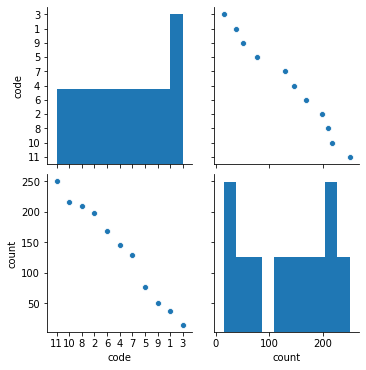

In [12]:
sns.pairplot(count_by_theme)